# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: A count and list of free-tier customers that are most likely to convert to paying based on activity and demographics.

#### 2. What are the predictors/covariates? 

Answer: demegraphic data (age, gender, location, profession) and usage data (activity, days since last use)

#### 3. What timeframe is this data relevent for?

Answer: January through April of 2015

#### 4. What is the hypothesis?

Answer: User activity and demographic data will allow us to predict which customers are most likely to convert from free to paying user-tiers.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable | dtype
---| ---| ---| ---
admit | admission outcome: 0 = not admitted 1 = admitted | categorical | int64
gre | revised general test scores | continuous | float64
gpa | grade point average | continuous | float64
rank/prestige | rank of applicant's undergraduate alma mater: 1 = highest 4 = lowest | continuous | float64


#### 2. What is the outcome?

Answer: Demonstrate the general test scores and grade point average values that correlate with admission and show if rank of alma mater has any influence on admission.

#### 3. What are the predictors/covariates? 

Answer: General test scores and grade point averages (and possibly rank/prestige) are predictors, admit (1 = yes, 0 = no) is the other covariate.

#### 4. What timeframe is this data relevent for?

Answer: August 2007 (although the data is generated hypothical data)

## Problem Statement

Answer: Using data for August 2007 graduate school admissions, determine the various factors that may influence admission into graduate school and the extent to which they influence admission. GRE, GPA and a ranking of the prestige of the applicants alma mater are all considered for evaluation.

#### 4. What is the hypothesis?

Hypothesis: Each of the factors is influential to admission result, but GRE and GPA are most influential: i.e. rank of alma mater might be used in order to tip the balance of an inconclusive result from the first two factors.

## Exploratory Analysis Plan

Exploratory analysis plan - examine data types, parameters and values of each variable and filter by admission outcome. Plot variables to see general distribution.

#### 1. What are the goals of the exploratory analysis? 

Answer: To determine what data types there are, what the maximum, minimum and mean of these are, and to see if there are any obvious correlations between them.

#### 2a. What are the assumptions of the distribution of data? 

Answer: Generally those with higher GPAs will also have higher GRE scores. GPA will range from 0 to 4 and GRE from 200 to 800.

Grade point average (GPA) is calculated by dividing the total amount of grade points earned by the total amount of credit hours attempted. It may range from 0.0 to a 4.0
Three scores are reported on the GRE General Test:
    a Verbal Reasoning score reported on a 200–800 score scale, in 1-point increments
    a Quantitative Reasoning score reported on a 200–800 score scale, in 1-point increments
    an Analytical Writing score reported on a 0–6 score scale, in half-point increments
Rank/prestige of alma mater has some objective method of scoring.

#### 2b. How will you determine the distribution of your data? 

Answer: Using maximum, minimum, describe and other functions on the values of GPA and GRE. Also plotting variables against one another to discover if there is any colinearity.

#### 3a. How might outliers impact your analysis? 

Answer: For example if someone with a high GPA and GRE, who is also from high ranking school does not get admitted, these examples will possibly be due to another factor that is not in the data set, This will impact results and filters such as maximum().

#### 3b. How will you test for outliers? 

Answer: Create a ranking system for groups of results in each category and a combined ranking. Then filter out any results that were not admitted, despite being above the standard deviation range in this ranking system. Similarly, filter out and results that were admitted, depsite being below the standard deviation range of this ranking system.

#### 4a. What is colinearity? 

Answer: This is when two variables show a linear relationship, although not necessarily a relationship of causality. If variables were charted on the x and y axes, an upwards diagonal line would be produced.

#### 4b. How will you test for colinearity? 

Answer: Chart two variables on x and y and see what relationship the plotted points suggest.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer:
##### 1. Import data and determine data types.
##### 2. Determine key parameters of variables; maximum, minimum, mean, standard deviation etc.
##### 3. Count number of admissions versus non-admissions, and make preliminary test of whether GRE, GPA or prestige of school have any obvious      baring on this.
##### 4. Plot GRE against GPA to determine if these variables have colinear relationship.
##### 5. Create ranking for combined GRE and GPA score.
##### 6. Identify outliers; e.g. high combined scores that don't lead to admission.
##### 7. Remove outliers and plot again.
##### 8. Group results by admitted/not-admitted to determine what range of scores are in each group.
##### 9. Plot these results.
##### 10. Determine probability of admission with range of scores.

# Exploratory analysis

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

### The first 10 rows of the _admissions_ file.

In [2]:
# reading the admissions file and showing first 10 rows
Location = r"..\assets\admissions.csv"
f = pd.read_csv(Location)
f[:10]

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


### Examine data types

In [3]:
# Show data types
f.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

### Using describe to show variables count, sum, max, min, etc.

In [4]:
# show the main parameter variations
f.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


### Testing that the _admit_ column is indeed binary

In [5]:
# admit is a binary variable indicating 1 = admitted, 0 = not admitted
f['admit'].unique()

array([0, 1], dtype=int64)

### Ranking system of _alma mater_ is 1 for high, 4 for low
##### There appear to be null values in this field.

In [6]:
# rank is the rank of an undergraduates alma mater 1 is high, 4 is low
f['prestige'].unique()

array([  3.,   1.,   4.,   2.,  nan])

### Count the number of admissions...

In [7]:
print f[f.admit == 1]['admit'].count()
print f['admit'].sum()

127
127


### and rejections.

In [8]:
print f[f.admit == 0]['admit'].count()

273


### Exploring the average, minimum and maximum gre for admission
### Nobody with a gre of less than 300 was admitted, but this does not guarantee admission

In [9]:
print 'mean gre of admitted: %r' % f[f.admit ==1]['gre'].mean()
print 'mean gre of not admitted: %r' % f[f.admit ==0]['gre'].mean()

mean gre of admitted: 618.8976377952756
mean gre of not admitted: 573.5793357933579


In [10]:
print "Lowest GRE admitted = %r, highest = %r" % (f[f.admit == 1]['gre'].min(), f[f.admit == 1]['gre'].max())
print "Lowest GRE not admitted = %r, highest = %r" % (f[f.admit == 0]['gre'].min(), f[f.admit == 0]['gre'].max())

Lowest GRE admitted = 300.0, highest = 800.0
Lowest GRE not admitted = 220.0, highest = 800.0


### Exploring the average, minimum and maximum gpa for admission
### Nobody with a gpa of less than 2.419 was admitted, but this does not guarantee admission

In [11]:
print 'mean gpa of admitted: %r' % f[f.admit ==1]['gpa'].mean()
print 'mean gpa of not admitted: %r' % f[f.admit ==0]['gpa'].mean()

mean gpa of admitted: 3.4892063492063485
mean gpa of not admitted: 3.345404411764704


In [12]:
print "Lowest GPA admitted = %r, highest = %r" % (f[f.admit == 1]['gpa'].min(), f[f.admit == 1]['gpa'].max())
print "Lowest GPA not admitted = %r, highest = %r" % (f[f.admit == 0]['gpa'].min(), f[f.admit == 0]['gpa'].max())

Lowest GPA admitted = 2.4199999999999999, highest = 4.0
Lowest GPA not admitted = 2.2599999999999998, highest = 4.0


### Exploring the average, minimum and maximum rank of alma mater for admission
### There are admissions for all ranks, but admissions on average have a better ranking alma mater.

In [13]:
print 'mean rank of admitted: %r' % f[f.admit ==1]['prestige'].mean()
print 'mean rank of not admitted: %r' % f[f.admit ==0]['prestige'].mean()

mean rank of admitted: 2.1507936507936507
mean rank of not admitted: 2.641025641025641


In [14]:
print "Lowest rank admitted = %r, highest = %r" % (f[f.admit == 1]['prestige'].max(), f[f.admit == 1]['prestige'].min())
print "Lowest rank not admitted = %r, highest = %r" % (f[f.admit == 0]['prestige'].max(), f[f.admit == 0]['prestige'].min())

Lowest rank admitted = 4.0, highest = 1.0
Lowest rank not admitted = 4.0, highest = 1.0


### Plotting GRE and GPA to see if there is colinear relationship.
### Whilst there is a general colinear relationship, there are numerous exceptions.

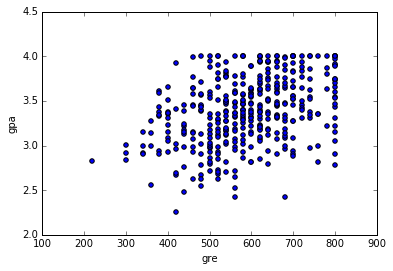

In [15]:
# plotting GRE and GPA
f.plot.scatter(x='gre', y='gpa')

### Plotting GPA against prestige rating of alma mater.
### There is not a clear relationship between ranking of school and GPA score.

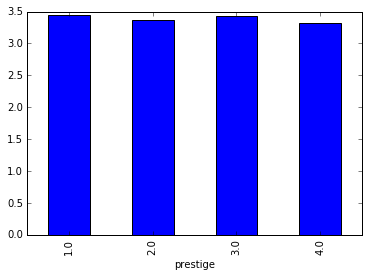

In [16]:
# plotting prestige and GPA
f_alma = f.groupby('prestige').mean()
f_alma['gpa'].plot.bar()

### Plotting GRE against prestige rating of alma mater.

### There is a general trend of better ranked schools (1 and 2) show better GRE scores.

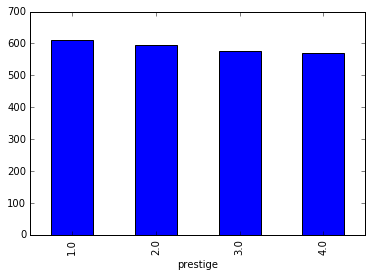

In [17]:
# plotting prestige and GRE
f_alma['gre'].plot.bar()

## Creating a ranking for each variable in order to create combined score.

### Ranking GRE scores.

In [18]:
# what GRE will count you out even if you have an 4 GPA?
GRE_groups = []
gre_range = f['gre'].max()-f['gre'].min()
gre_increment = gre_range/10
for gre in f['gre']:
    if gre > (f['gre'].min() + 9*gre_increment):
        GRE_groups.append(10)
    elif gre > (f['gre'].min() + 8*gre_increment):
        GRE_groups.append(9)
    elif gre > (f['gre'].min() + 7*gre_increment):
        GRE_groups.append(8)
    elif gre > (f['gre'].min() + 6*gre_increment):
        GRE_groups.append(7)
    elif gre > (f['gre'].min() + 5*gre_increment):
        GRE_groups.append(6)
    elif gre > (f['gre'].min() + 4*gre_increment):
        GRE_groups.append(5)
    elif gre > (f['gre'].min() + 3*gre_increment):
        GRE_groups.append(4)
    elif gre > (f['gre'].min() + 2*gre_increment):
        GRE_groups.append(3)
    elif gre > (f['gre'].min() + 1*gre_increment):
        GRE_groups.append(2)
    elif gre > f['gre'].min():
        GRE_groups.append(1)
    else:
        GRE_groups.append(0)
f['GREgroup'] = GRE_groups

### Ranking GPA scores

In [19]:
# what GPA will count you out even if you have an 800 GRE?
GPA_groups = []
gpa_range = f['gpa'].max()-f['gpa'].min()
gpa_increment = gpa_range/10
for gpa in f['gpa']:
    if gpa > (f['gpa'].min() + 9*gpa_increment):
        GPA_groups.append(10)
    elif gpa > (f['gpa'].min() + 8*gpa_increment):
        GPA_groups.append(9)
    elif gpa > (f['gpa'].min() + 7*gpa_increment):
        GPA_groups.append(8)
    elif gpa > (f['gpa'].min() + 6*gpa_increment):
        GPA_groups.append(7)
    elif gpa > (f['gpa'].min() + 5*gpa_increment):
        GPA_groups.append(6)
    elif gpa > (f['gpa'].min() + 4*gpa_increment):
        GPA_groups.append(5)
    elif gpa > (f['gpa'].min() + 3*gpa_increment):
        GPA_groups.append(4)
    elif gpa > (f['gpa'].min() + 2*gpa_increment):
        GPA_groups.append(3)
    elif gpa > (f['gpa'].min() + 1*gpa_increment):
        GPA_groups.append(2)
    elif gpa > f['gpa'].min():
        GPA_groups.append(1)
    else:
        GPA_groups.append(0)
f['GPAgroup'] = GPA_groups

### Ranking alma mater 'Prestige'

In [20]:
rank = []

for rk in f['prestige']:
    if rk == 1:
        rank.append(10)
    elif rk == 2:
        rank.append(7.5)
    elif rk == 3:
        rank.append(5)
    elif rk == 4:
        rank.append(2.5)
    else:
        rank.append(0)
f['Rank'] = rank

### Creating Combined Score field

In [21]:
f['Combined'] = f['GREgroup'] + f['GPAgroup'] + f['Rank']
f.head()

,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
0,0,380,3.61,3,3,8,5.0,16.0
1,1,660,3.67,3,8,9,5.0,22.0
2,1,800,4.00,1,10,10,10.0,30.0
3,1,640,3.19,4,8,6,2.5,16.5
4,0,520,2.93,4,6,4,2.5,12.5


### Sorting by combined score to see if there are still non-admissions amongst those that rank highly across all categories.

### 3 non-admissions still exist amongst the top 10 combined ranking

In [22]:
franked = f.sort_values('Combined', ascending=False)
franked.head(10)

,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
2,1,800,4.00,1,10,10,10,30
293,0,800,3.97,1,10,10,10,30
12,1,760,4.00,1,10,10,10,30
69,0,800,3.73,1,10,9,10,29
25,1,800,3.66,1,10,9,10,29
202,1,700,4.00,1,9,10,10,29
165,0,700,4.00,1,9,10,10,29
14,1,700,4.00,1,9,10,10,29
118,1,800,3.70,1,10,9,10,29
150,1,800,3.74,1,10,9,10,29


In [23]:
standev = franked['Combined'].std()
standev

4.421657049700135

### There are 31 highly ranked individuals that didn't get admitted.

In [24]:
# outliers - combined scored of more than standard deviation, but not admitted
franked[(franked.admit == 0) & (franked.Combined > (franked['Combined'].mean() + standev))].count()

admit       31
gre         31
gpa         31
prestige    31
GREgroup    31
GPAgroup    31
Rank        31
Combined    31
dtype: int64

### 1 admissions still exists amongst the bottom 10 combined ranking

In [25]:
franked.tail(10)

,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
212,0,NaN,2.87,2,0,4,7.5,11.5
238,0,500,2.86,4,5,4,2.5,11.5
17,0,360,2.56,3,3,2,5.0,10.0
83,0,380,2.91,4,3,4,2.5,9.5
304,0,220,2.83,3,0,4,5.0,9.0
48,0,440,2.48,4,4,2,2.5,8.5
71,0,300,2.92,4,2,4,2.5,8.5
236,1,660,NaN,NaN,8,0,0.0,8.0
187,0,NaN,NaN,2,0,0,7.5,7.5
289,0,420,2.26,4,4,0,2.5,6.5


### There are 10 low ranked individuals that did get admitted.

In [26]:
# outliers - combined scored of less than standard deviation, but admitted
franked[(franked.admit == 1) & (franked.Combined < (franked['Combined'].mean() - standev))].count()

admit       10
gre         10
gpa          9
prestige     9
GREgroup    10
GPAgroup    10
Rank        10
Combined    10
dtype: int64

In [27]:
print "Lowest combined GPA/GRE rank admitted = %r, highest = %r" % (f[f.admit == 1]['Combined'].min(), f[f.admit == 1]['Combined'].max())
print "Lowest cobined GPA/GRE rank not admitted = %r, highest = %r" % (f[f.admit == 0]['Combined'].min(), f[f.admit == 0]['Combined'].max())

Lowest combined GPA/GRE rank admitted = 8.0, highest = 30.0
Lowest cobined GPA/GRE rank not admitted = 6.5, highest = 30.0


## Identifying Outliers

### Outliers include those with a combined score above the range of standard deviation, that are not admitted and those with a combined score below the range of standard deviation, that are admitted.

In [28]:
# identifying outliers and creating column
outliers = []
fil = np.array(f)
for x in range(len(fil)):
    if (fil[x,0] == 0) and (fil[x,7] > (f['Combined'].mean() + standev)):
        outliers.append('outlier')
    elif (fil[x,0] == 1) and (fil[x,7] < (f['Combined'].mean() - standev)):
        outliers.append('outlier')
    else:
        outliers.append('inlier')
f['Outliers'] = outliers
f.head(10)

,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined,Outliers
0,0,380,3.61,3,3,8,5.0,16.0,inlier
1,1,660,3.67,3,8,9,5.0,22.0,inlier
2,1,800,4.00,1,10,10,10.0,30.0,inlier
3,1,640,3.19,4,8,6,2.5,16.5,inlier
4,0,520,2.93,4,6,4,2.5,12.5,inlier
5,1,760,3.00,2,10,5,7.5,22.5,inlier
6,1,560,2.98,1,6,5,10.0,21.0,inlier
7,0,400,3.08,2,4,5,7.5,16.5,inlier
8,1,540,3.39,3,6,7,5.0,18.0,inlier
9,0,700,3.92,2,9,10,7.5,26.5,outlier


### New file without Outliers

In [29]:
inliers = f[f.Outliers == 'inlier']
inliers.head(10)

,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined,Outliers
0,0,380,3.61,3,3,8,5.0,16.0,inlier
1,1,660,3.67,3,8,9,5.0,22.0,inlier
2,1,800,4.00,1,10,10,10.0,30.0,inlier
3,1,640,3.19,4,8,6,2.5,16.5,inlier
4,0,520,2.93,4,6,4,2.5,12.5,inlier
5,1,760,3.00,2,10,5,7.5,22.5,inlier
6,1,560,2.98,1,6,5,10.0,21.0,inlier
7,0,400,3.08,2,4,5,7.5,16.5,inlier
8,1,540,3.39,3,6,7,5.0,18.0,inlier
10,0,800,4.00,4,10,10,2.5,22.5,inlier


### Replotting GRE and GPA without outliers.

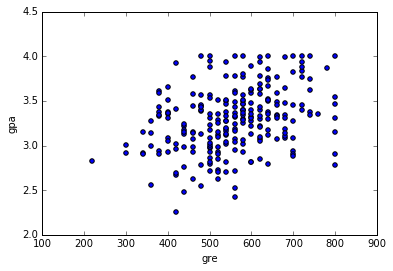

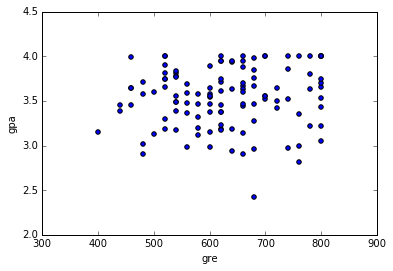

In [30]:
# plotting GRE and GPA again 
inliers[inliers.admit == 0].plot.scatter(x='gre', y='gpa'),
inliers[inliers.admit == 1].plot.scatter(x='gre', y='gpa')

### Plotting the distribution of combined scored and admission

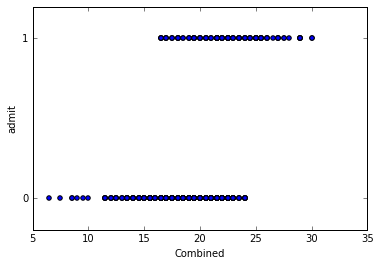

In [31]:
inliers.plot.scatter(x='Combined', y='admit', yticks=(0,1))

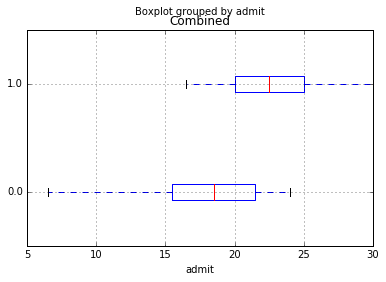

In [45]:
#box plot for above
bp = inliers.boxplot(column=['Combined'], vert=False, by='admit')

### Grouping by admission outcome.

In [33]:
admissions = inliers.groupby('admit').mean()
admissions

,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
admit,,,,,,,
0,557.083333,3.292573,2.768595,6.210744,6.380165,5.578512,18.169421
1,629.059829,3.539231,2.094017,7.452991,7.777778,7.264957,22.495726


### Average and maximum/minimum combined score versus admissions outcome

In [34]:
print "Lowest combined ranking admitted = %r, highest = %r" % (inliers[inliers.admit == 1]['Combined'].min(), inliers[inliers.admit == 1]['Combined'].max())
print "Lowest combined not admitted = %r, highest = %r" % (inliers[inliers.admit == 0]['Combined'].min(), inliers[inliers.admit == 0]['Combined'].max())

Lowest combined ranking admitted = 16.5, highest = 30.0
Lowest combined not admitted = 6.5, highest = 24.0


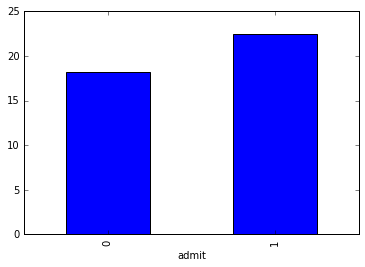

In [35]:
admissions['Combined'].plot.bar()

### Creating new fields to show top halves of GRE and GPA scores

In [38]:
gre_top = []
for x in inliers['GREgroup']:
    if x > 5:
        gre_top.append('top')
    else:
        gre_top.append('bottom')
inliers['GREsection'] = gre_top

In [39]:
gpa_top = []
for x in inliers['GPAgroup']:
    if x > 5:
        gpa_top.append('top')
    else:
        gpa_top.append('bottom')
inliers['GPAsection'] = gpa_top

In [40]:
comb = []
for x in inliers['Combined']:
    if x > 20:
        comb.append('top')
    else:
        comb.append('bottom')
inliers['CombinedGroup'] = comb

In [72]:
ranksch = []
for x in inliers['prestige']:
    if x < 3:
        ranksch.append('top')
    else:
        ranksch.append('bottom')
inliers['rankschool'] = ranksch

In [57]:
len(inliers)

360

## If your GRE score is in the top half, what chance of admission do you have?

In [41]:
admissionsGRE = inliers.groupby('GREsection').sum()
a = (inliers['gre'].mean(), 1.0*admissionsGRE['admit']['top']/inliers['GREsection'][inliers.GREsection =='top'].count())
b = (inliers['gre'].mean(), 1.0*admissionsGRE['admit']['bottom']/inliers['GREsection'][inliers.GREsection =='bottom'].count())
c = (1.0*admissionsGRE['admit']['top']/inliers['GREsection'][inliers.GREsection =='top'].count())/(1.0*admissionsGRE['admit']['bottom']/inliers['GREsection'][inliers.GREsection =='bottom'].count())
print 'A GRE of over %d gives you a %1.2f chance of admission.' % a
print 'A GRE of below %d gives you a %1.2f chance of admission.' % b
print 'A better than average GRE gives you %1.2f times the chance of admission.' % c
admissionsGRE

A GRE of over 580 gives you a 0.39 chance of admission.
A GRE of below 580 gives you a 0.14 chance of admission.
A better than average GRE gives you 2.91 times the chance of admission.


,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
GREsection,,,,,,,,
bottom,13,40860,301.43,257,397,556,545,1498
top,104,166440,906.17,658,1978,1898,1655,5531


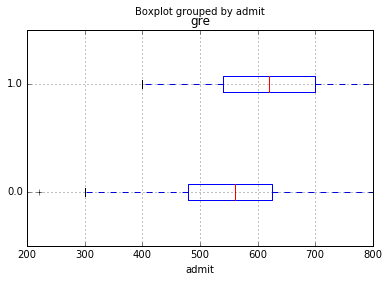

In [46]:
bp = inliers.boxplot(column=['gre'], vert=False, by='admit')

## If your GPA score is in the top half, what chance of admission do you have?

In [42]:
admissionsGPA = inliers.groupby('GPAsection').sum()
d = (inliers['gpa'].mean(), 1.0*admissionsGPA['admit']['top']/inliers['GPAsection'][inliers.GPAsection =='top'].count())
e = (inliers['gpa'].mean(), 1.0*admissionsGPA['admit']['bottom']/inliers['GPAsection'][inliers.GPAsection =='bottom'].count())
f = (1.0*admissionsGPA['admit']['top']/inliers['GPAsection'][inliers.GPAsection =='top'].count())/(1.0*admissionsGPA['admit']['bottom']/(inliers['GPAsection'][inliers.GPAsection =='bottom'].count()))
print 'A GPA of over %1.2f gives you a %1.2f chance of admission.' % d
print 'A GPA of over %1.2f gives you a %1.2f chance of admission.' % e
print 'A better than average GPA gives you %1.2f times the chance of admission.' % f
admissionsGPA

A GPA of over 3.37 gives you a 0.39 chance of admission.
A GPA of over 3.37 gives you a 0.14 chance of admission.
A better than average GPA gives you 2.71 times the chance of admission.


,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
GPAsection,,,,,,,,
bottom,14,50240,276.26,242,553,395,595,1543
top,103,157060,931.34,673,1822,2059,1605,5486


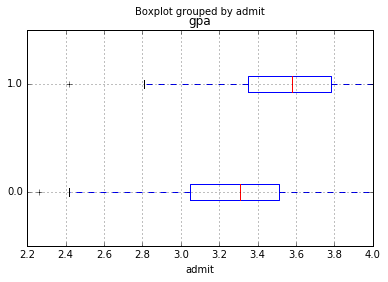

In [47]:
bp = inliers.boxplot(column=['gpa'], vert=False, by='admit')

### If you come from a higher ranked school what chance of admission do you have?

In [74]:
alma_mater = inliers.groupby('rankschool').sum()
g = (1.0*alma_mater['admit']['top']/inliers['rankschool'][inliers.rankschool =='top'].count())
h = (1.0*alma_mater['admit']['bottom']/inliers['rankschool'][inliers.rankschool =='bottom'].count())
j = (1.0*alma_mater['admit']['top']/inliers['rankschool'][inliers.rankschool =='top'].count())/(1.0*alma_mater['admit']['bottom']/(inliers['rankschool'][inliers.rankschool =='bottom'].count()))

print 'Coming from a high ranked school gives you a %1.2f chance of admission.' % g
print 'Coming from a lower ranked school gives you a %1.2f chance of admission.' % h
print 'A better than average Combined Score gives you %1.2f times the chance of admission.' % j
alma_mater

Coming from a high ranked school gives you a 0.46 chance of admission.
Coming from a lower ranked school gives you a 0.19 chance of admission.
A better than average Combined Score gives you 2.42 times the chance of admission.


,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
rankschool,,,,,,,,
bottom,35,104220,619.38,610,1182,1279,750,3211
top,82,103080,588.22,305,1193,1175,1450,3818


In [44]:
combine = inliers.groupby('CombinedGroup').sum()
l = (inliers['Combined'].mean(), 1.0*combine['admit']['top']/inliers['CombinedGroup'][inliers.CombinedGroup =='top'].count())
m = (inliers['Combined'].mean(), 1.0*combine['admit']['bottom']/inliers['CombinedGroup'][inliers.CombinedGroup =='bottom'].count())
n = (1.0*combine['admit']['top']/inliers['CombinedGroup'][inliers.CombinedGroup =='top'].count())/(1.0*combine['admit']['bottom']/inliers['CombinedGroup'][inliers.CombinedGroup =='bottom'].count())
print 'A Combined Score of over %1.1f gives you a %1.2f chance of admission.' % l
print 'A Combined Score of below %1.1f gives you a %1.2f chance of admission.' % m
print 'A better than average Combined Score gives you %1.2f times the chance of admission.' % n
combine

A Combined Score of over 19.6 gives you a 0.51 chance of admission.
A Combined Score of below 19.6 gives you a 0.17 chance of admission.
A better than average Combined Score gives you 3.07 times the chance of admission.


,admit,gre,gpa,prestige,GREgroup,GPAgroup,Rank,Combined
CombinedGroup,,,,,,,,
bottom,32,99120,611.55,569,1077,1124,977.5,3178.5
top,85,108180,596.05,346,1298,1330,1222.5,3850.5


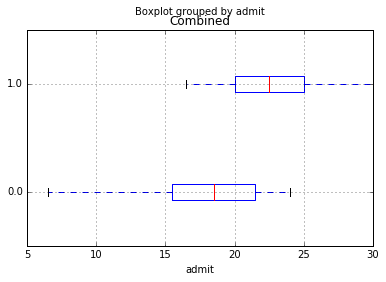

In [48]:
bp = inliers.boxplot(column=['Combined'], vert=False, by='admit')

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

## 1. Analysis method
##### The hypothesis was that each of the factors is important, but GRE and GPA are most important. Also that rank of alma mater might be used in order to tip the balance of an unclear result from the first two factors.
##### Predictors for admission turned out to be inconclusive individually since many individuals had lower GRE scores but higher GPA scores and vice versa. So cumulative score was created for GRE, GPA and alma mater, in order to take in all factors that might improve the chance of admission.
##### Outliers were identified as those with a cumulitive score above the range of standard deviation that were not admitted and those that were below the range but were admitted. These outliers were then removed.
##### Lastly the probability of being admitted given and above average GRE, GPA or school rank was calculated, to use as a predictors.

## 2. Alternative problem statement.
##### A. Since prestige of alma mater is the most subjective of the values/variable in our data set, and it is the worst predictor of admission, it would be useful to come up with a school ranking system based on admission success, and GRE/GPA scores. Without specific school as a field, this is not strictly possible, but students could be ranked by these factors in anticipation of getting specific school data at a later date. This problem statement would read as follows:
##### _"Using the graduate school admissions data for August 2007, create a scoring system for students based on admission result and GRE/GPA scores. From this score determine an average score per student from that school . Use this average score to predict admission results for students the following year. Hypothesis: average admissions results and GPA/GRE scores can be use to create a scoring system for schools that can be used to predict admissions outcomes for future years."_

##### B. Alternatively a simple problem statement might take prestige of school and GPA as a predictor for GRE, and read as follows:
##### _"Using the graduate school admissions data for August 2007, use the rank of  prestige of school and GPA scores to predict the average GRE score of students."_ 

## 3. Assumptions and Risks
##### A. The first of these analysis, assumes that a model based on the results of one year of students can be applied to the following year. This may not be the case if universities increase or decrease places on their courses, or schools improve or worsen their standards for some reason. Such scores could be averaged out over multiple years to account for these factors. The obvious risk is that we may never know the actual school that specific students come from and so couldn't apply the model at all.
##### B. The main assumption here is that prestige of school is in any way an objective measure. The main risk is that prestige bares little or no relationship to GPA or GRE and therefore be of no relevance.